## DEVOIR 02:APPLICATION DES DIFFERENTES METHODES DE DISCRETISATION

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import KBinsDiscretizer
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Charger le dataset Wine
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print("Aperçu du dataset Wine:")
print(df.head(), "\n")

Aperçu du dataset Wine:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proli

In [4]:
# On choisit une variable continue à discrétiser, ex: "alcohol"
X = df[['alcohol']].values
y = df['target'].values

### Méthode basée sur la discrétisation

### Intervalles de largeur égales

#### Explication : ici,nous divisons la plage des valeurs en intervalles de meme longueur. Choississons k=3.Pour ce faire,nous allons calculer les bornes avec la formue suivante :Largeur=(max−min)/nombres d intervalles

#### k=3 est souvent utilisé si on sait qu’il y a environ 3 sous-groupes naturels dans la donnée (ici, le dataset Wine a 3 classes de vin).

#### Donc le choix de k=3 est cohérent avec le nombre de classes réelles (target) du dataset.

Variable: alcohol
Valeur min = 11.03, max = 14.83
Largeur d'intervalle = 1.27

Bornes des intervalles : [np.float64(11.03), np.float64(12.3), np.float64(13.56), np.float64(14.83)] 

Intervalles avec bornes infinies:
Intervalle 0 : [-∞, 12.30)
Intervalle 1 : [12.30, 13.56)
Intervalle 2 : [13.56, +∞]

Aperçu (10 premières lignes):
   alcohol  alcohol_equal_width
0    14.23                    2
1    13.20                    1
2    13.16                    1
3    14.37                    2
4    13.24                    1
5    14.20                    2
6    14.39                    2
7    14.06                    2
8    14.83                    2
9    13.86                    2

ANALYSE DE LA DISCRÉTISATION

1. Répartition des observations par intervalle:
Intervalle 0: 41 observations (23.0%)
Intervalle 1: 86 observations (48.3%)
Intervalle 2: 51 observations (28.7%)

2. Statistiques par intervalle:

Intervalle 0:
  Nombre: 41
  Min: 11.03
  Max: 12.29
  Moyenne: 11.93

Intervalle 1:
  Nom

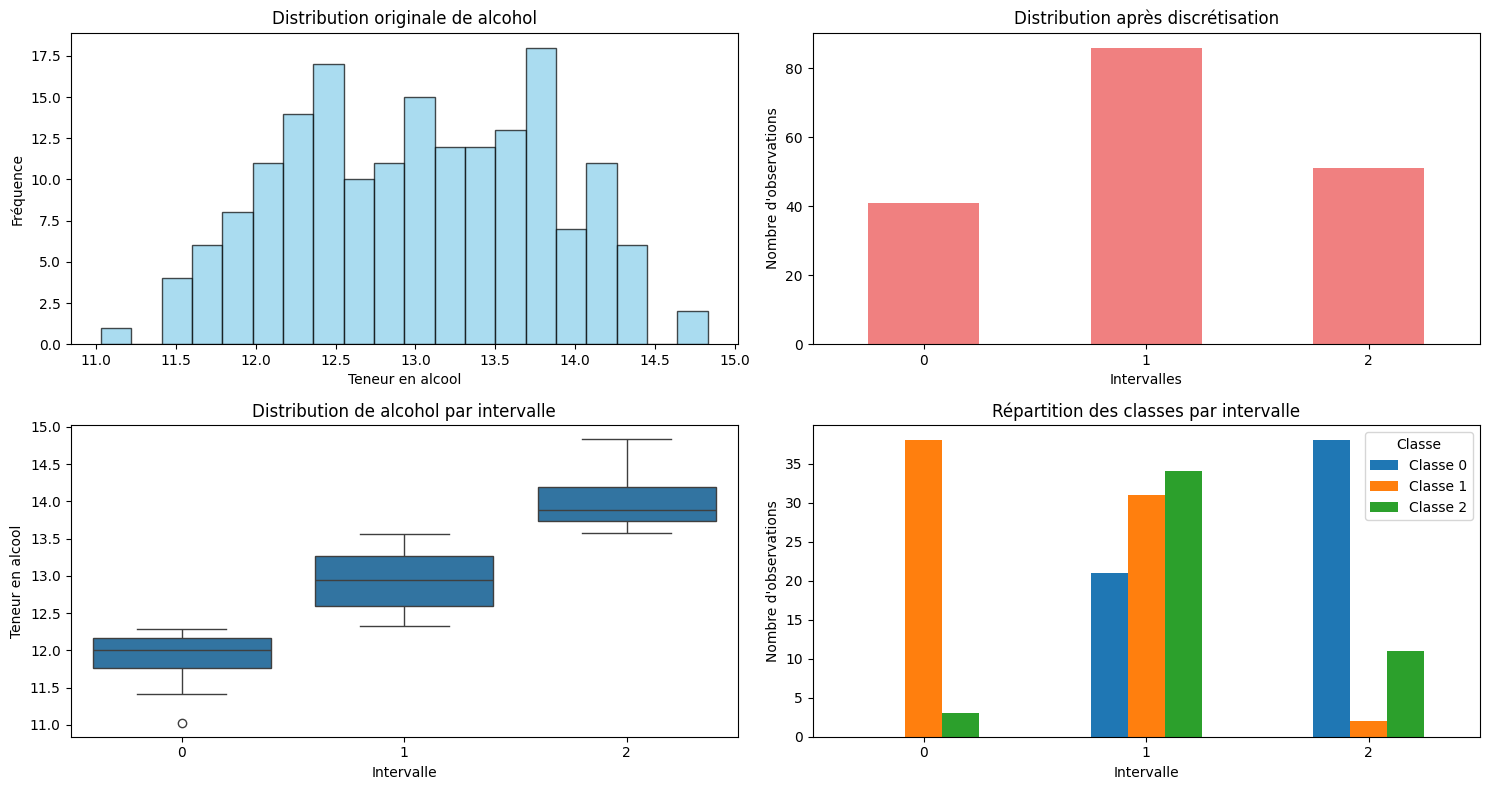


EXPLICATION DES GRAPHIQUES

1. BOÎTE À MOUSTACHES (Boxplot):
   - La boîte représente les 50% centraux des données (Q1 à Q3)
   - La ligne dans la boîte est la médiane
   - Les 'moustaches' s'étendent jusqu'aux valeurs non aberrantes
   - Les points au-delà des moustaches sont des valeurs aberrantes
   - Ce graphique montre comment se répartissent les valeurs d'alcool dans chaque intervalle

2. DIAGRAMME EN BARRES GROUPÉES:
   - Montre le nombre d'observations de chaque classe (0, 1, 2) dans chaque intervalle
   - Permet de voir si certaines classes sont surreprésentées dans certains intervalles
   - Exemple: Si la classe 1 domine dans l'intervalle 2, cela signifie que les vins de classe 1
     ont généralement une teneur en alcool dans cette plage

Intervalles avec notation infinie:
Intervalle 0 ]-∞, 12.3[: 41 observations
Intervalle 1 [12.3, 13.6[: 86 observations
Intervalle 2 [13.6, +∞[: 51 observations


In [8]:

# Variable choisie
col = 'alcohol'
values = df[col].values

# Paramètres
k = 3  # nombre d'intervalles
vmin, vmax = values.min(), values.max()

# Formule
width = (vmax - vmin) / k
bins = [vmin + i*width for i in range(k)] + [vmax]  # bornes des intervalles

# Discrétisation
df['alcohol_equal_width'] = pd.cut(values, bins=bins, labels=False, include_lowest=True)

# Affichage
print(f"Variable: {col}")
print(f"Valeur min = {vmin:.2f}, max = {vmax:.2f}")
print(f"Largeur d'intervalle = {width:.2f}")
print("\nBornes des intervalles :", [round(b, 2) for b in bins], "\n")

# Afficher chaque intervalle avec -∞ et +∞
print("Intervalles avec bornes infinies:")
for i in range(len(bins) - 1):
    gauche = bins[i]
    droite = bins[i+1]
    if i == 0:
        print(f"Intervalle {i} : [-∞, {droite:.2f})")
    elif i == len(bins) - 2:
        print(f"Intervalle {i} : [{gauche:.2f}, +∞]")
    else:
        print(f"Intervalle {i} : [{gauche:.2f}, {droite:.2f})")

print("\nAperçu (10 premières lignes):")
print(df[[col, 'alcohol_equal_width']].head(10))

# ANALYSE DES RÉSULTATS
print("\n" + "="*50)
print("ANALYSE DE LA DISCRÉTISATION")
print("="*50)

# 1. Distribution des observations par intervalle
print("\n1. Répartition des observations par intervalle:")
interval_counts = df['alcohol_equal_width'].value_counts().sort_index()
for interval, count in interval_counts.items():
    percentage = (count / len(df)) * 100
    print(f"Intervalle {interval}: {count} observations ({percentage:.1f}%)")

# 2. Statistiques descriptives par intervalle
print("\n2. Statistiques par intervalle:")
for i in range(k):
    mask = df['alcohol_equal_width'] == i
    original_values = df.loc[mask, col]
    print(f"\nIntervalle {i}:")
    print(f"  Nombre: {len(original_values)}")
    print(f"  Min: {original_values.min():.2f}")
    print(f"  Max: {original_values.max():.2f}")
    print(f"  Moyenne: {original_values.mean():.2f}")

# 3. Relation avec la variable cible
print("\n3. Relation avec la variable target:")
cross_tab = pd.crosstab(df['alcohol_equal_width'], df['target'])
print(cross_tab)

# VISUALISATIONS
plt.figure(figsize=(15, 8))

# Graphique 1: Distribution originale vs discrétisée
plt.subplot(2, 2, 1)
plt.hist(values, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution originale de alcohol')
plt.xlabel('Teneur en alcool')
plt.ylabel('Fréquence')

plt.subplot(2, 2, 2)
df['alcohol_equal_width'].value_counts().sort_index().plot(kind='bar', color='lightcoral')
plt.title('Distribution après discrétisation')
plt.xlabel('Intervalles')
plt.ylabel('Nombre d\'observations')
plt.xticks(rotation=0)

# Graphique 3: Boxplot par intervalle
plt.subplot(2, 2, 3)
sns.boxplot(x='alcohol_equal_width', y=col, data=df)
plt.title('Distribution de alcohol par intervalle')
plt.xlabel('Intervalle')
plt.ylabel('Teneur en alcool')

# Graphique 4: Relation avec la target (diagramme en barres groupées)
plt.subplot(2, 2, 4)
cross_tab.plot(kind='bar', ax=plt.gca())
plt.title('Répartition des classes par intervalle')
plt.xlabel('Intervalle')
plt.ylabel('Nombre d\'observations')
plt.legend(title='Classe', labels=['Classe 0', 'Classe 1', 'Classe 2'])
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# EXPLICATION DES GRAPHIQUES
print("\n" + "="*50)
print("EXPLICATION DES GRAPHIQUES")
print("="*50)

print("\n1. BOÎTE À MOUSTACHES (Boxplot):")
print("   - La boîte représente les 50% centraux des données (Q1 à Q3)")
print("   - La ligne dans la boîte est la médiane")
print("   - Les 'moustaches' s'étendent jusqu'aux valeurs non aberrantes")
print("   - Les points au-delà des moustaches sont des valeurs aberrantes")
print("   - Ce graphique montre comment se répartissent les valeurs d'alcool dans chaque intervalle")

print("\n2. DIAGRAMME EN BARRES GROUPÉES:")
print("   - Montre le nombre d'observations de chaque classe (0, 1, 2) dans chaque intervalle")
print("   - Permet de voir si certaines classes sont surreprésentées dans certains intervalles")
print("   - Exemple: Si la classe 1 domine dans l'intervalle 2, cela signifie que les vins de classe 1")
print("     ont généralement une teneur en alcool dans cette plage")

# Création d'étiquettes avec bornes infinies pour une meilleure compréhension
labels = []
for i in range(len(bins) - 1):
    if i == 0:
        labels.append(f"]-∞, {bins[1]:.1f}[")
    elif i == len(bins) - 2:
        labels.append(f"[{bins[i]:.1f}, +∞[")
    else:
        labels.append(f"[{bins[i]:.1f}, {bins[i+1]:.1f}[")

print(f"\nIntervalles avec notation infinie:")
for i, label in enumerate(labels):
    count = (df['alcohol_equal_width'] == i).sum()
    print(f"Intervalle {i} {label}: {count} observations")

### Fréquences égales

#### Explication: ici chaque intervalle contient environ le meme nombres d instances.Pour ce faire,appliquons la formule taille_intervalle=nombre d obserations/nombre d intervalles

DÉMARRAGE DE LA VÉRIFICATION MANUELLE
Nombre total d'observations: 178

1. TRI DES VALEURS:
Valeurs triées (5 premières): [11.03 11.41 11.45 11.46 11.56]
Valeurs triées (5 dernières): [14.38 14.38 14.39 14.75 14.83]

2. CALCUL MANUEL DES BORNES:
Indices des quantiles: [0, 59, 118, 177]
Bornes manuelles: [np.float64(11.03), np.float64(12.52), np.float64(13.48), np.float64(14.83)]

3. COMPTAGE MANUEL PAR INTERVALLE:
Intervalle 0:
  Plage: [11.03, 12.52]
  → 60 observations (33.7%)
Intervalle 1:
  Plage: (12.52, 13.48]
  → 59 observations (33.1%)
Intervalle 2:
  Plage: (13.48, 14.83]
  → 59 observations (33.1%)

Total vérifié: 178 observations

4. ANALYSE DÉTAILLÉE PAR INTERVALLE:

--- INTERVALLE 0 ---
Plage: [11.03, 12.52]
Nombre: 60
Min: 11.03
Max: 12.52
Moyenne: 12.08
Médiane: 12.16
Écart-type: 0.33

--- INTERVALLE 1 ---
Plage: (12.52, 13.48]
Nombre: 59
Min: 12.53
Max: 13.48
Moyenne: 13.03
Médiane: 13.05
Écart-type: 0.26

--- INTERVALLE 2 ---
Plage: (13.48, 14.83]
Nombre: 59
Min: 13.49

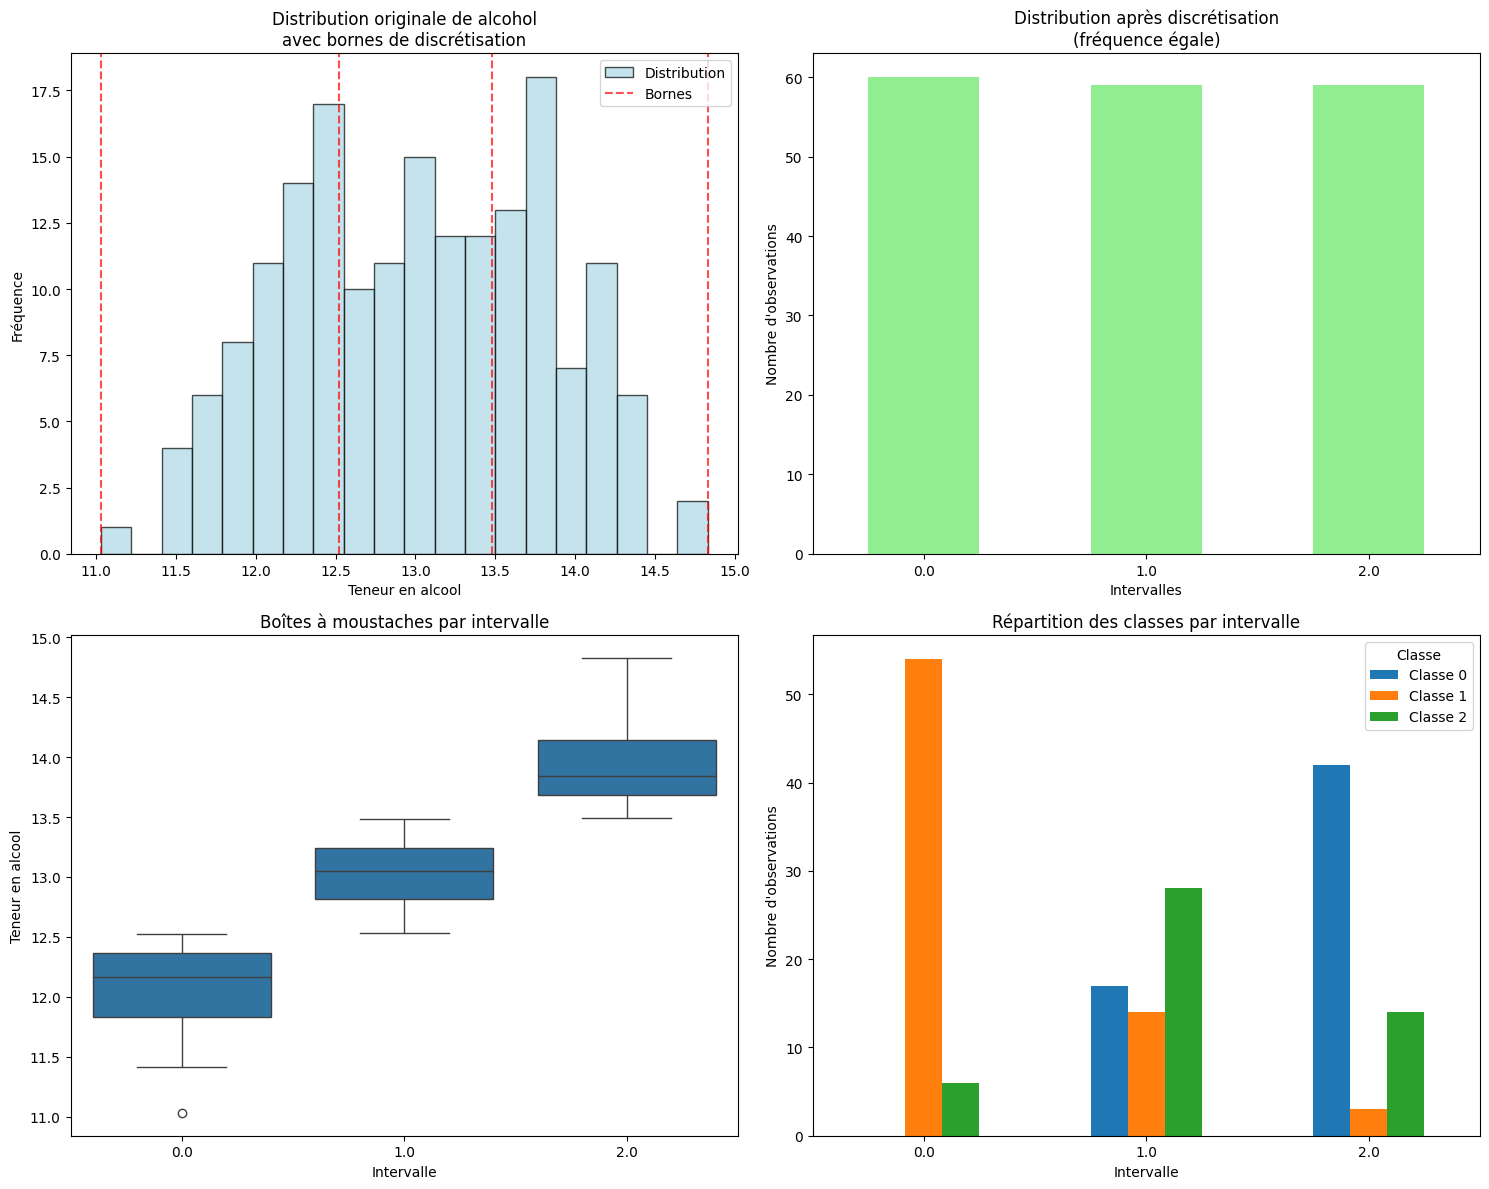


6. ANALYSE DES BOÎTES À MOUSTACHES:

--- BOÎTE À MOUSTACHES - INTERVALLE 0 ---
Médiane: 12.16
Q1 (25%): 11.84
Q3 (75%): 12.36
IQR: 0.53
Bornes aberrantes: [11.04, 13.15]
Valeurs aberrantes: 1

--- BOÎTE À MOUSTACHES - INTERVALLE 1 ---
Médiane: 13.05
Q1 (25%): 12.82
Q3 (75%): 13.24
IQR: 0.42
Bornes aberrantes: [12.18, 13.88]
Valeurs aberrantes: 0

--- BOÎTE À MOUSTACHES - INTERVALLE 2 ---
Médiane: 13.84
Q1 (25%): 13.68
Q3 (75%): 14.14
IQR: 0.46
Bornes aberrantes: [12.99, 14.84]
Valeurs aberrantes: 0

7. INTERVALLES DESCRIPTIFS:
Intervalles descriptifs:
Intervalle 0: Faible alcool [-∞, 12.5]
  → 60 observations, plage réelle: [11.0, 12.5]
Intervalle 1: Alcool moyen [12.5, 13.5]
  → 59 observations, plage réelle: [12.5, 13.5]
Intervalle 2: Fort alcool [13.5, +∞]
  → 59 observations, plage réelle: [13.5, 14.8]

SYNTHÈSE DE LA DISCRÉTISATION PAR FRÉQUENCES ÉGALES
✓ Méthode appliquée: Fréquences égales (méthode manuelle)
✓ Principe: Les données sont triées et divisées en intervalles
✓ Objec

In [10]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print("DÉMARRAGE DE LA VÉRIFICATION MANUELLE")
print("="*60)

# Variable choisie
col = 'alcohol'
values = df[col].values
n_obs = len(values)

print(f"Nombre total d'observations: {n_obs}")

# 1. TRI DES VALEURS (du plus petit au plus grand)
print("\n1. TRI DES VALEURS:")
sorted_values = np.sort(values)
print(f"Valeurs triées (5 premières): {sorted_values[:5].round(2)}")
print(f"Valeurs triées (5 dernières): {sorted_values[-5:].round(2)}")

# 2. CALCUL MANUEL DES BORNES
print("\n2. CALCUL MANUEL DES BORNES:")
k = 3  # nombre d'intervalles

# Calcul correct des indices
indices_quantiles = [int(n_obs * i/k) for i in range(k+1)]
# Ajuster le dernier indice pour qu'il soit dans les bornes
indices_quantiles[-1] = n_obs - 1

print(f"Indices des quantiles: {indices_quantiles}")

# Bornes manuelles
bornes_manuelles = [sorted_values[i] for i in indices_quantiles]
print(f"Bornes manuelles: {[round(b, 2) for b in bornes_manuelles]}")

# 3. COMPTAGE MANUEL PAR INTERVALLE
print("\n3. COMPTAGE MANUEL PAR INTERVALLE:")
comptage_manuel = []
intervalles_manuels = np.zeros(n_obs)  # Pour stocker les labels d'intervalles

for i in range(k):
    if i == 0:
        # Premier intervalle : [borne_inf, borne_sup]
        mask = (values >= bornes_manuelles[i]) & (values <= bornes_manuelles[i+1])
    else:
        # Intervalles suivants : (borne_inf, borne_sup]
        mask = (values > bornes_manuelles[i]) & (values <= bornes_manuelles[i+1])
    
    count = np.sum(mask)
    pourcentage = (count / n_obs) * 100
    comptage_manuel.append(count)
    
    # Stocker les labels d'intervalles
    intervalles_manuels[mask] = i
    
    print(f"Intervalle {i}:")
    if i == 0:
        print(f"  Plage: [{bornes_manuelles[i]:.2f}, {bornes_manuelles[i+1]:.2f}]")
    else:
        print(f"  Plage: ({bornes_manuelles[i]:.2f}, {bornes_manuelles[i+1]:.2f}]")
    print(f"  → {count} observations ({pourcentage:.1f}%)")

print(f"\nTotal vérifié: {sum(comptage_manuel)} observations")

# 4. AJOUT AU DATAFRAME
df['alcohol_equal_freq_manuel'] = intervalles_manuels

# 5. ANALYSE DÉTAILLÉE DE CHAQUE INTERVALLE
print("\n4. ANALYSE DÉTAILLÉE PAR INTERVALLE:")
for i in range(k):
    print(f"\n--- INTERVALLE {i} ---")
    
    mask_intervalle = (df['alcohol_equal_freq_manuel'] == i)
    donnees_intervalle = df.loc[mask_intervalle, col]
    
    if i == 0:
        print(f"Plage: [{bornes_manuelles[i]:.2f}, {bornes_manuelles[i+1]:.2f}]")
    else:
        print(f"Plage: ({bornes_manuelles[i]:.2f}, {bornes_manuelles[i+1]:.2f}]")
        
    print(f"Nombre: {len(donnees_intervalle)}")
    print(f"Min: {donnees_intervalle.min():.2f}")
    print(f"Max: {donnees_intervalle.max():.2f}")
    print(f"Moyenne: {donnees_intervalle.mean():.2f}")
    print(f"Médiane: {np.median(donnees_intervalle):.2f}")
    print(f"Écart-type: {donnees_intervalle.std():.2f}")

# 6. RELATION AVEC LA VARIABLE CIBLE
print("\n5. RELATION AVEC LA VARIABLE TARGET:")
cross_tab = pd.crosstab(df['alcohol_equal_freq_manuel'], df['target'])
print(cross_tab)

# 7. VISUALISATIONS
plt.figure(figsize=(15, 12))

# Graphique 1: Distribution originale avec bornes
plt.subplot(2, 2, 1)
plt.hist(values, bins=20, alpha=0.7, color='lightblue', edgecolor='black', label='Distribution')
for i, borne in enumerate(bornes_manuelles):
    plt.axvline(x=borne, color='red', linestyle='--', alpha=0.7, 
                label='Bornes' if i == 0 else "")
plt.title('Distribution originale de alcohol\navec bornes de discrétisation')
plt.xlabel('Teneur en alcool')
plt.ylabel('Fréquence')
plt.legend()

# Graphique 2: Distribution après discrétisation
plt.subplot(2, 2, 2)
df['alcohol_equal_freq_manuel'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Distribution après discrétisation\n(fréquence égale)')
plt.xlabel('Intervalles')
plt.ylabel('Nombre d\'observations')
plt.xticks(rotation=0)

# Graphique 3: Boîte à moustaches par intervalle
plt.subplot(2, 2, 3)
sns.boxplot(x='alcohol_equal_freq_manuel', y='alcohol', data=df)
plt.title('Boîtes à moustaches par intervalle')
plt.xlabel('Intervalle')
plt.ylabel('Teneur en alcool')

# Graphique 4: Relation avec la target
plt.subplot(2, 2, 4)
cross_tab.plot(kind='bar', ax=plt.gca())
plt.title('Répartition des classes par intervalle')
plt.xlabel('Intervalle')
plt.ylabel('Nombre d\'observations')
plt.legend(title='Classe', labels=['Classe 0', 'Classe 1', 'Classe 2'])
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# 8. ANALYSE DES BOÎTES À MOUSTACHES
print("\n6. ANALYSE DES BOÎTES À MOUSTACHES:")
for i in range(k):
    print(f"\n--- BOÎTE À MOUSTACHES - INTERVALLE {i} ---")
    
    mask_intervalle = (df['alcohol_equal_freq_manuel'] == i)
    donnees_intervalle = df.loc[mask_intervalle, col]
    
    Q1 = np.percentile(donnees_intervalle, 25)
    Q3 = np.percentile(donnees_intervalle, 75)
    IQR = Q3 - Q1
    borne_inf = Q1 - 1.5 * IQR
    borne_sup = Q3 + 1.5 * IQR
    valeurs_aberrantes = donnees_intervalle[(donnees_intervalle < borne_inf) | (donnees_intervalle > borne_sup)]
    
    print(f"Médiane: {np.median(donnees_intervalle):.2f}")
    print(f"Q1 (25%): {Q1:.2f}")
    print(f"Q3 (75%): {Q3:.2f}")
    print(f"IQR: {IQR:.2f}")
    print(f"Bornes aberrantes: [{borne_inf:.2f}, {borne_sup:.2f}]")
    print(f"Valeurs aberrantes: {len(valeurs_aberrantes)}")

# 9. CRÉATION D'ÉTIQUETTES DESCRIPTIVES
print("\n7. INTERVALLES DESCRIPTIFS:")
labels_desc = []
for i in range(len(bornes_manuelles) - 1):
    if i == 0:
        labels_desc.append(f"Faible alcool [-∞, {bornes_manuelles[1]:.1f}]")
    elif i == len(bornes_manuelles) - 2:
        labels_desc.append(f"Fort alcool [{bornes_manuelles[i]:.1f}, +∞]")
    else:
        labels_desc.append(f"Alcool moyen [{bornes_manuelles[i]:.1f}, {bornes_manuelles[i+1]:.1f}]")

print("Intervalles descriptifs:")
for i, label in enumerate(labels_desc):
    count = (df['alcohol_equal_freq_manuel'] == i).sum()
    min_val = df[df['alcohol_equal_freq_manuel'] == i]['alcohol'].min()
    max_val = df[df['alcohol_equal_freq_manuel'] == i]['alcohol'].max()
    print(f"Intervalle {i}: {label}")
    print(f"  → {count} observations, plage réelle: [{min_val:.1f}, {max_val:.1f}]")

# 10. SYNTHÈSE
print("\n" + "="*60)
print("SYNTHÈSE DE LA DISCRÉTISATION PAR FRÉQUENCES ÉGALES")
print("="*60)

print("✓ Méthode appliquée: Fréquences égales (méthode manuelle)")
print("✓ Principe: Les données sont triées et divisées en intervalles")
print("✓ Objectif: Chaque intervalle contient ≈ même nombre d'observations")
print(f"✓ Résultat: {comptage_manuel} observations par intervalle")
print(f"✓ Écart maximum: {max(comptage_manuel) - min(comptage_manuel)} observation(s)")

print("\nInterprétation des boîtes à moustaches:")
print("- La boîte représente les 50% centraux des données (Q1 à Q3)")
print("- La ligne dans la boîte est la médiane")
print("- Les moustaches s'étendent jusqu'aux valeurs non aberrantes")
print("- Les points isolés sont des valeurs aberrantes")

print("\nLa discrétisation par fréquences égales a été réalisée avec succès!")

### Entropie 

#### Explication:ici,nous minimise l'entropie de classe dans chaque intervalle

Seuils optimaux trouvés par l'arbre de décision (entropie): [np.float64(12.18), np.float64(12.78), np.float64(13.72)]

Intervalles avec bornes infinies:
Intervalle 0 : [-∞, 12.18)
Intervalle 1 : [12.18, 12.78)
Intervalle 2 : [12.78, 13.72)
Intervalle 3 : [13.72, +∞]

Information mutuelle avec la cible: 0.4670

ANALYSE DE LA DISCRÉTISATION PAR ENTROPIE

1. Répartition des observations par intervalle:
Intervalle 0: 31 observations (17.4%)
Intervalle 1: 42 observations (23.6%)
Intervalle 2: 64 observations (36.0%)
Intervalle 3: 41 observations (23.0%)

2. Relation avec la variable target:
target            0   1   2
alcohol_entropy            
0                 0  31   0
1                 0  31  11
2                26   8  30
3                33   1   7

3. Pureté des intervalles (classe majoritaire):
Intervalle 0: Classe 1 (100.0%) - 31 observations
Intervalle 1: Classe 1 (73.8%) - 42 observations
Intervalle 2: Classe 2 (46.9%) - 64 observations
Intervalle 3: Classe 0 (80.5%) - 41 observ

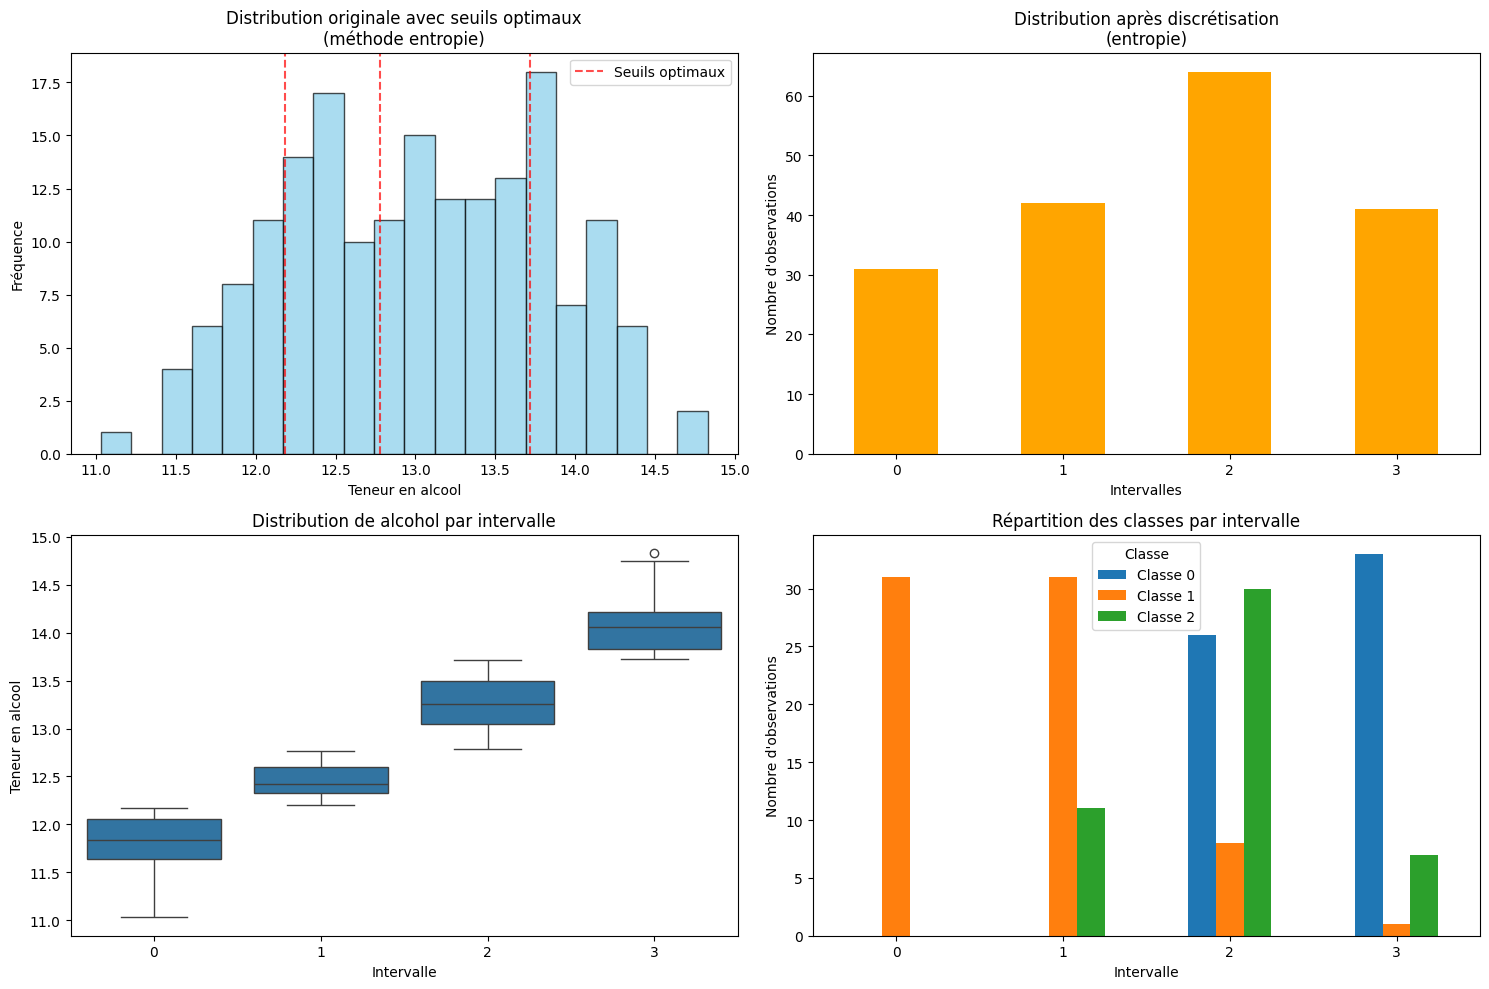


COMPARAISON DES MÉTHODES
Largeur égale - Information mutuelle: 0.31045940012199513
Fréquence égale - Information mutuelle: 0.37789395784729063
Entropie - Information mutuelle: 0.4670015877174661

Aperçu des différentes discrétisations (10 premières lignes):
   alcohol  alcohol_equal_width  alcohol_equal_freq  alcohol_entropy
0    14.23                    2                 2.0                3
1    13.20                    1                 1.0                2
2    13.16                    1                 1.0                2
3    14.37                    2                 2.0                3
4    13.24                    1                 1.0                2
5    14.20                    2                 2.0                3
6    14.39                    2                 2.0                3
7    14.06                    2                 2.0                3
8    14.83                    2                 2.0                3
9    13.86                    2                 2.0

In [20]:

# Variable choisie
X = df[['alcohol']]
y = df['target']

# Méthode par entropie utilisant un arbre de décision
tree_model = DecisionTreeClassifier(
    criterion='entropy',
    max_leaf_nodes=4,  # k+1 feuilles pour k intervalles
    min_samples_leaf=5,
    random_state=42
)

# Ajuster l'arbre sur la variable continue
tree_model.fit(X, y)

# Récupérer les seuils de coupure (triés et uniques)
seuils = np.unique(tree_model.tree_.threshold[tree_model.tree_.threshold != -2])
seuils = sorted(seuils[seuils != -2])  # Enlever les valeurs par défaut

print("Seuils optimaux trouvés par l'arbre de décision (entropie):", [round(s, 2) for s in seuils])

# Discrétiser selon ces seuils
df['alcohol_entropy'] = np.digitize(X.values.ravel(), bins=seuils)

# Afficher les intervalles avec -∞ et +∞
print("\nIntervalles avec bornes infinies:")
for i in range(len(seuils) + 1):
    if i == 0:
        print(f"Intervalle {i} : [-∞, {seuils[i]:.2f})")
    elif i == len(seuils):
        print(f"Intervalle {i} : [{seuils[i-1]:.2f}, +∞]")
    else:
        print(f"Intervalle {i} : [{seuils[i-1]:.2f}, {seuils[i]:.2f})")

# Évaluer la pertinence avec l'information mutuelle
mi = mutual_info_classif(df[['alcohol_entropy']], y, discrete_features=True)
print(f"\nInformation mutuelle avec la cible: {mi[0]:.4f}")

# ANALYSE DES RÉSULTATS
print("\n" + "="*50)
print("ANALYSE DE LA DISCRÉTISATION PAR ENTROPIE")
print("="*50)

# 1. Distribution des observations par intervalle
print("\n1. Répartition des observations par intervalle:")
interval_counts = df['alcohol_entropy'].value_counts().sort_index()
for interval, count in interval_counts.items():
    percentage = (count / len(df)) * 100
    print(f"Intervalle {interval}: {count} observations ({percentage:.1f}%)")

# 2. Relation avec la variable cible
print("\n2. Relation avec la variable target:")
cross_tab = pd.crosstab(df['alcohol_entropy'], df['target'])
print(cross_tab)

# 3. Pureté des intervalles
print("\n3. Pureté des intervalles (classe majoritaire):")
for i in range(len(seuils) + 1):
    mask = df['alcohol_entropy'] == i
    if mask.sum() > 0:
        target_dist = df.loc[mask, 'target'].value_counts()
        major_class = target_dist.index[0]
        major_percent = (target_dist.iloc[0] / mask.sum()) * 100
        print(f"Intervalle {i}: Classe {major_class} ({major_percent:.1f}%) - {mask.sum()} observations")

# VISUALISATIONS
plt.figure(figsize=(15, 10))

# Graphique 1: Distribution originale avec seuils
plt.subplot(2, 2, 1)
plt.hist(df['alcohol'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
for seuil in seuils:
    plt.axvline(x=seuil, color='red', linestyle='--', alpha=0.7, label='Seuils optimaux' if seuil == seuils[0] else "")
plt.title('Distribution originale avec seuils optimaux\n(méthode entropie)')
plt.xlabel('Teneur en alcool')
plt.ylabel('Fréquence')
plt.legend()

# Graphique 2: Distribution après discrétisation
plt.subplot(2, 2, 2)
df['alcohol_entropy'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Distribution après discrétisation\n(entropie)')
plt.xlabel('Intervalles')
plt.ylabel('Nombre d\'observations')
plt.xticks(rotation=0)

# Graphique 3: Boxplot par intervalle
plt.subplot(2, 2, 3)
sns.boxplot(x='alcohol_entropy', y='alcohol', data=df)
plt.title('Distribution de alcohol par intervalle')
plt.xlabel('Intervalle')
plt.ylabel('Teneur en alcool')

# Graphique 4: Relation avec la target
plt.subplot(2, 2, 4)
cross_tab.plot(kind='bar', ax=plt.gca())
plt.title('Répartition des classes par intervalle')
plt.xlabel('Intervalle')
plt.ylabel('Nombre d\'observations')
plt.legend(title='Classe', labels=['Classe 0', 'Classe 1', 'Classe 2'])
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# COMPARAISON AVEC LES AUTRES MÉTHODES
print("\n" + "="*50)
print("COMPARAISON DES MÉTHODES")
print("="*50)

print("Largeur égale - Information mutuelle:", 
      mutual_info_classif(df[['alcohol_equal_width']], y, discrete_features=True)[0])
print("Fréquence égale - Information mutuelle:", 
      mutual_info_classif(df[['alcohol_equal_freq']], y, discrete_features=True)[0])
print("Entropie - Information mutuelle:", mi[0])

print("\nAperçu des différentes discrétisations (10 premières lignes):")
print(df[['alcohol', 'alcohol_equal_width', 'alcohol_equal_freq', 'alcohol_entropy']].head(10))

Principe : L'arbre de décision trouve les coupures qui maximisent le gain d'information (minimisent l'entropie) pour séparer les classes.

Avantages :

    Les intervalles sont optimisés pour discriminer les classes cibles

    Meilleure séparation entre les groupes

    Plus d'information préservée pour la prédiction
La méthode par entropie devrait donner une information mutuelle plus élevée que les autres méthodes car elle est optimisée pour la classification !
                                                                                         

### Methode basée sur le clustering 

#### Explication: On applique un algorithme de clustering sur les valeurs continues, puis on affecte chaque cluster à un intervalle.

#### Exemple : appliquer k-means sur la variable alcohol avec k=3 → 3 groupes naturels : faible, moyen, fort.

Centres des clusters (KMeans):
Cluster 0 : centre = 12.09
Cluster 1 : centre = 13.02
Cluster 2 : centre = 13.90

Bornes estimées entre clusters : [np.float64(12.55), np.float64(13.46)] 

Intervalles avec bornes infinies:
Intervalle 0 : [-∞, 12.55)
Intervalle 1 : [12.55, 13.46)
Intervalle 2 : [13.46, +∞]

ANALYSE DE LA DISCRÉTISATION PAR CLUSTERING

1. Répartition des observations par cluster:
Cluster 0: 61 observations (34.3%)
Cluster 1: 61 observations (34.3%)
Cluster 2: 56 observations (31.5%)

2. Statistiques par cluster:

Cluster 0 (centre: 12.09):
  Nombre: 61
  Min: 11.03
  Max: 12.53
  Moyenne: 12.09
  Écart-type: 0.34

Cluster 1 (centre: 13.02):
  Nombre: 61
  Min: 13.48
  Max: 14.83
  Moyenne: 13.90
  Écart-type: 0.32

Cluster 2 (centre: 13.90):
  Nombre: 56
  Min: 12.58
  Max: 13.45
  Moyenne: 13.02
  Écart-type: 0.25

3. Relation avec la variable target:
target             0   1   2
alcohol_clusters            
0                  0  54   7
1                 43   3  15
2     

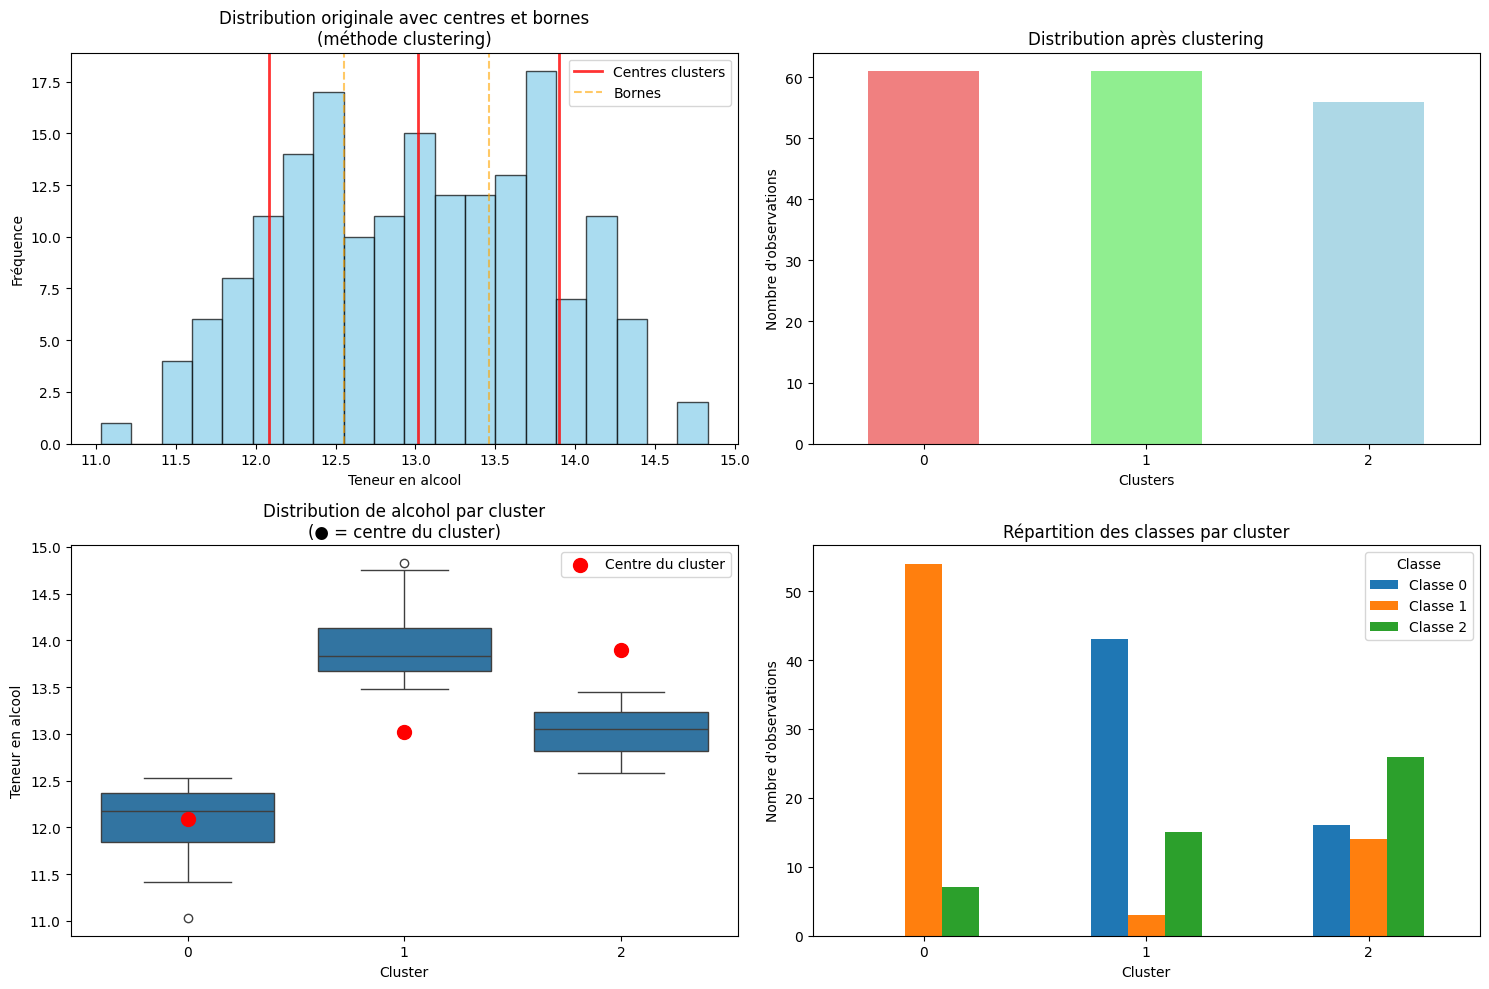


COMPARAISON DES MÉTHODES
Information mutuelle avec la cible:
  Largeur égale: 0.3105
  Fréquence égale: 0.3779
  Entropie: 0.4670
  Clustering: 0.3768

SYNTHÈSE DES INTERVALLES - CLUSTERING

Caractérisation des clusters:
Cluster 0 (Faible alcool):
  Centre: 12.09, Moyenne réelle: 12.09
  61 observations, Classe majoritaire: 1
Cluster 1 (Moyen alcool):
  Centre: 13.02, Moyenne réelle: 13.90
  61 observations, Classe majoritaire: 0
Cluster 2 (Élevé alcool):
  Centre: 13.90, Moyenne réelle: 13.02
  56 observations, Classe majoritaire: 2

Aperçu des différentes discrétisations (10 premières lignes):
   alcohol  alcohol_equal_width  alcohol_equal_freq  alcohol_entropy  \
0    14.23                    2                 2.0                3   
1    13.20                    1                 1.0                2   
2    13.16                    1                 1.0                2   
3    14.37                    2                 2.0                3   
4    13.24                    1     

In [22]:

# On récupère la colonne alcohol comme array numpy
X = df['alcohol'].values.reshape(-1, 1)

# KMeans avec 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
clusters = kmeans.fit_predict(X)
df['alcohol_clusters'] = clusters

# Centres des clusters
centres = np.sort(kmeans.cluster_centers_.flatten())

print("Centres des clusters (KMeans):")
for i, c in enumerate(centres):
    print(f"Cluster {i} : centre = {c:.2f}")

# Déterminer les bornes des intervalles (à partir des centres triés)
# Les coupures sont à mi-chemin entre deux centres
bornes = []
for i in range(len(centres)-1):
    borne = (centres[i] + centres[i+1]) / 2
    bornes.append(borne)

print("\nBornes estimées entre clusters :", [round(b, 2) for b in bornes], "\n")

# Afficher les intervalles de chaque cluster avec -∞ et +∞
print("Intervalles avec bornes infinies:")
for i in range(len(centres)):
    if i == 0:
        print(f"Intervalle {i} : [-∞, {bornes[i]:.2f})")
    elif i == len(centres)-1:
        print(f"Intervalle {i} : [{bornes[i-1]:.2f}, +∞]")
    else:
        print(f"Intervalle {i} : [{bornes[i-1]:.2f}, {bornes[i]:.2f})")

# ANALYSE DES RÉSULTATS
print("\n" + "="*50)
print("ANALYSE DE LA DISCRÉTISATION PAR CLUSTERING")
print("="*50)

# 1. Distribution des observations par cluster
print("\n1. Répartition des observations par cluster:")
cluster_counts = df['alcohol_clusters'].value_counts().sort_index()
for cluster, count in cluster_counts.items():
    percentage = (count / len(df)) * 100
    print(f"Cluster {cluster}: {count} observations ({percentage:.1f}%)")

# 2. Statistiques descriptives par cluster
print("\n2. Statistiques par cluster:")
for i in range(3):
    mask = df['alcohol_clusters'] == i
    original_values = df.loc[mask, 'alcohol']
    print(f"\nCluster {i} (centre: {centres[i]:.2f}):")
    print(f"  Nombre: {len(original_values)}")
    print(f"  Min: {original_values.min():.2f}")
    print(f"  Max: {original_values.max():.2f}")
    print(f"  Moyenne: {original_values.mean():.2f}")
    print(f"  Écart-type: {original_values.std():.2f}")

# 3. Relation avec la variable cible
print("\n3. Relation avec la variable target:")
cross_tab = pd.crosstab(df['alcohol_clusters'], df['target'])
print(cross_tab)

# 4. Évaluation de la qualité du clustering
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, clusters)
print(f"\n4. Score de silhouette: {silhouette_avg:.4f}")
print("   (Plus proche de 1 = meilleure séparation des clusters)")

# VISUALISATIONS
plt.figure(figsize=(15, 10))

# Graphique 1: Distribution originale avec centres des clusters
plt.subplot(2, 2, 1)
plt.hist(df['alcohol'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
for centre in centres:
    plt.axvline(x=centre, color='red', linestyle='-', alpha=0.8, linewidth=2, label='Centres clusters' if centre == centres[0] else "")
for borne in bornes:
    plt.axvline(x=borne, color='orange', linestyle='--', alpha=0.6, label='Bornes' if borne == bornes[0] else "")
plt.title('Distribution originale avec centres et bornes\n(méthode clustering)')
plt.xlabel('Teneur en alcool')
plt.ylabel('Fréquence')
plt.legend()

# Graphique 2: Distribution après clustering
plt.subplot(2, 2, 2)
df['alcohol_clusters'].value_counts().sort_index().plot(kind='bar', color=['lightcoral', 'lightgreen', 'lightblue'])
plt.title('Distribution après clustering')
plt.xlabel('Clusters')
plt.ylabel('Nombre d\'observations')
plt.xticks(rotation=0)

# Graphique 3: Boxplot par cluster
plt.subplot(2, 2, 3)
sns.boxplot(x='alcohol_clusters', y='alcohol', data=df)
for i, centre in enumerate(centres):
    plt.scatter(i, centre, color='red', s=100, zorder=5, label='Centre du cluster' if i == 0 else "")
plt.title('Distribution de alcohol par cluster\n(● = centre du cluster)')
plt.xlabel('Cluster')
plt.ylabel('Teneur en alcool')
plt.legend()

# Graphique 4: Relation avec la target
plt.subplot(2, 2, 4)
cross_tab.plot(kind='bar', ax=plt.gca())
plt.title('Répartition des classes par cluster')
plt.xlabel('Cluster')
plt.ylabel('Nombre d\'observations')
plt.legend(title='Classe', labels=['Classe 0', 'Classe 1', 'Classe 2'])
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# COMPARAISON AVEC LES AUTRES MÉTHODES
print("\n" + "="*50)
print("COMPARAISON DES MÉTHODES")
print("="*50)

methods = ['alcohol_equal_width', 'alcohol_equal_freq', 'alcohol_entropy', 'alcohol_clusters']
method_names = ['Largeur égale', 'Fréquence égale', 'Entropie', 'Clustering']

print("Information mutuelle avec la cible:")
for method, name in zip(methods, method_names):
    if method in df.columns:
        mi = mutual_info_classif(df[[method]], y, discrete_features=True)[0]
        print(f"  {name}: {mi:.4f}")

# AFFICHAGE SYNTHÉTIQUE
print("\n" + "="*50)
print("SYNTHÈSE DES INTERVALLES - CLUSTERING")
print("="*50)

# Créer des étiquettes descriptives basées sur les centres
labels_clusters = []
for i in range(len(centres)):
    if centres[i] < 13:
        niveau = "Faible"
    elif centres[i] < 13.5:
        niveau = "Moyen"
    else:
        niveau = "Élevé"
    labels_clusters.append(f"{niveau} alcool")

print("\nCaractérisation des clusters:")
for i in range(len(centres)):
    mask = df['alcohol_clusters'] == i
    count = mask.sum()
    mean_alc = df.loc[mask, 'alcohol'].mean()
    major_class = df.loc[mask, 'target'].value_counts().index[0]
    print(f"Cluster {i} ({labels_clusters[i]}):")
    print(f"  Centre: {centres[i]:.2f}, Moyenne réelle: {mean_alc:.2f}")
    print(f"  {count} observations, Classe majoritaire: {major_class}")

print("\nAperçu des différentes discrétisations (10 premières lignes):")
print(df[['alcohol', 'alcohol_equal_width', 'alcohol_equal_freq', 'alcohol_entropy', 'alcohol_clusters']].head(10))

Principe :

    K-means groupe les données en clusters basés sur la similarité

    Les centres des clusters déterminent les coupures naturelles

    Les bornes sont à mi-distance entre les centres

Avantages :

    Trouve des regroupements naturels dans les données

    Prend en compte la densité de distribution

    Meilleur pour les distributions non uniformes

#### En résumé

Largeur égale	Divise en intervalles de même amplitude

Fréquence égale	Divise en intervalles avec même nombre d'observations

Entropie	Optimise les coupures pour séparer les classes

Clustering	Trouve des groupes naturels dans les données